In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/FoxFortino/stylefile/master/custom.mplstyle")

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"

plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.major.width"] = 1

plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.major.width"] = 1

plt.rcParams["axes.linewidth"] = 1

In [5]:
osc = pd.read_csv("allstrippedOpenSNe_z.csv")
osc

,Name,Disc. Date,R.A.,Dec.,z,Type,Phot.,Spec.,Radio,X-ray
0,SN2021uyc,8/4/21,56:45.3,+27:54:18.11,0.019046,Ic,NaN,1.0,NaN,NaN
1,SN2021uth,8/3/21,29:02.9,+09:17:26.54,0.025,IIb,NaN,1.0,NaN,NaN
2,SN2021urb,7/31/21,34:26.1,+09:11:01.96,0.127,Ic,NaN,1.0,NaN,NaN
3,SN2021uhk,7/29/21,26:13.6,+01:08:43.92,0.034544,Ib,NaN,1.0,NaN,NaN
4,SN2021vci,7/29/21,51:25.4,-02:48:07.96,0.021938,IIb,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1548,SN1966J,12/20/66,"10:19:45,10:19:45.8,10:19:45.41","+45:30.2,+45:30:10.0,+45:30:14.2",0.0022,Ia,93.0,1.0,NaN,NaN
1549,SN1964L,12/11/64,"11:52:49.09,11:52:49.2,11:52:49.07,11:52:49.10","+44:07:45.4,+44:07:45.48,+44:07:45.1","0.00263,0.0027",Ic,61.0,1.0,NaN,NaN
1550,SN1962L,11/23/62,"02:43:40,02:43:42.7,02:43:40.94","+01:23.9,+01:23:52.0,+01:23:49.7",0.004,Ic,154.0,1.0,NaN,NaN
1551,SN1954A,4/10/54,"12:15:45,12:15:45.8,12:15:46.09","+36:16.2,+36:16:14.0,+36:16:05.0",0.00097,Ib,166.0,12.0,NaN,NaN


In [6]:
nSpec = osc["Spec."].to_numpy()
no_spec = np.isnan(nSpec)
nSpec[no_spec] = 0
nSpec = nSpec.astype(int)
nSpec

array([ 1,  1,  1, ...,  1, 12,  1])

In [7]:
disc_date = []

for date in osc["Disc. Date"]:
    month, day, year = date.split("/")
    
    if 0 <= int(year) <= 21:
        year = "20" + year
    else:
        year = "19" + year
    
    if 1 <= int(month) <= 9:
        month = "0" + month
    
    if 1 <= int(day) <= 9:
        day = "0" + day
        
    disc_date.append(("/").join([month, day, year]))
    
disc_date = pd.to_datetime(disc_date, format="%m/%d/%Y")
osc['Disc Date']= disc_date
disc_date

DatetimeIndex(['2021-08-04', '2021-08-03', '2021-07-31', '2021-07-29',
               '2021-07-29', '2021-07-27', '2021-07-26', '2021-07-26',
               '2021-07-17', '2021-07-17',
               ...
               '1983-07-03', '1983-05-11', '1982-10-24', '1976-03-28',
               '1972-12-05', '1966-12-20', '1964-12-11', '1962-11-23',
               '1954-04-10', '1948-05-28'],
              dtype='datetime64[ns]', length=1553, freq=None)

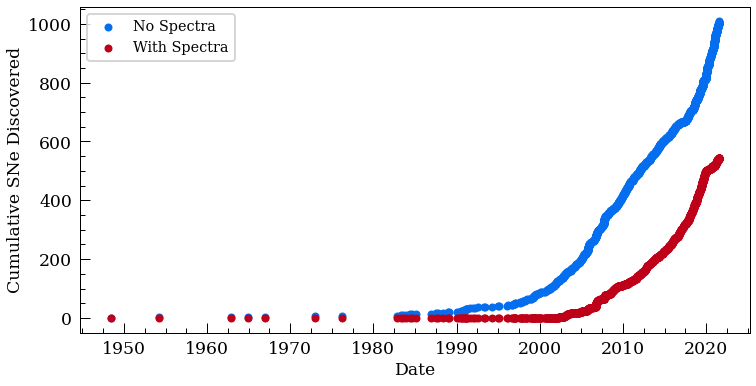

In [8]:
disc_with_spec = np.zeros(disc_date.shape)
disc_with_spec[~no_spec] = 1

disc_without_spec = np.zeros(disc_date.shape)
disc_without_spec[no_spec] = 1

plt.figure(figsize=(12, 6))
plt.scatter(disc_date, np.cumsum(disc_with_spec)[::-1], label="No Spectra")
plt.scatter(disc_date, np.cumsum(disc_without_spec)[::-1], label="With Spectra")

plt.ylabel("Cumulative SNe Discovered")
plt.xlabel("Date")

plt.legend()
plt.show()

In [9]:
osc['year'] = osc['Disc Date'].dt.year

In [10]:
all_df = osc.groupby("year").count()[["Name"]]
all_df.describe()

,Name
count,47.000000
mean,33.042553
std,40.131283
min,1.000000
25%,1.500000
50%,10.000000
75%,61.500000
max,162.000000


In [12]:
nospec_df = osc.loc[osc["Spec."].isin([1,2])].groupby("year").count()[["Name"]]
nospec_df.describe()

,Name
count,35.000000
mean,21.942857
std,30.736970
min,1.000000
25%,1.000000
50%,13.000000
75%,20.500000
max,120.000000


In [13]:
multispec_df = osc.loc[osc["Spec."] >2].groupby("year").count()[["Name"]]
multispec_df.describe()

,Name
count,33.000000
mean,7.272727
std,5.524224
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,17.000000


In [14]:
final_df = all_df.merge(nospec_df, right_index=True, left_index=True, how="outer").rename(
    {"Name_x":"all", "Name_y":"one"}, axis=1).merge(
    multispec_df, right_index=True, left_index=True, how="outer").rename(
    {"Name":"multi"}, axis=1)
final_df

,all,one,multi
year,,,
1948,1,1.0,NaN
1954,1,NaN,1.0
1962,1,1.0,NaN
1964,1,1.0,NaN
1966,1,1.0,NaN
1972,1,NaN,NaN
1976,1,1.0,NaN
1982,1,NaN,NaN
1983,3,NaN,2.0


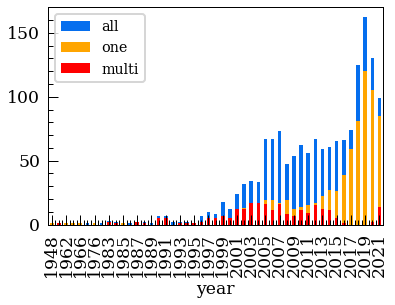

In [15]:
ax = final_df[["all"]].plot.bar()
ax = final_df[["one"]].plot.bar(ax=ax, color="orange", label="one or two")
ax = final_df[["multi"]].plot.bar(ax=ax, color="red")

ax.set_xticks(ax.get_xticks()[::2]);



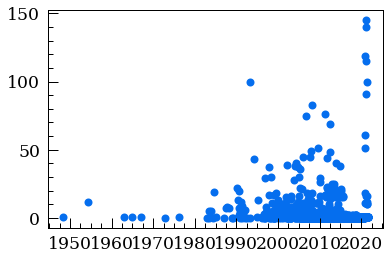

In [12]:
plt.scatter(disc_date, nSpec)

In [13]:

my_cols = ['event','alias','catalog','claimedtype','dec','discoverdate','discoverer','download','ebv','host','hostdec','hostoffsetang','hostoffsetdist','hostra','instruments','lumdist','maxabsmag','maxappmag','maxdate','name','photolink','ra','radiolink','redshift','references','spectralink','velocity','xraylink']
pd.read_csv("allOpenSNe_z.csv", names=my_cols, sep=',', quotechar='"', error_bad_lines=False,
            engine='python', nrows=1000)


/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_7023/985878614.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv("allOpenSNe_z.csv", names=my_cols, sep=',', quotechar='"', error_bad_lines=False,


FileNotFoundError: [Errno 2] No such file or directory: 'allOpenSNe_z.csv'

In [14]:
!pwd

/Users/fbb/Desktop/untitled folder


In [17]:
tmp_ = pd.read_json("catalog.json")
tmp_

,name,alias,discoverer,discoverdate,maxdate,maxappmag,maxabsmag,host,ra,dec,...,ebv,hostra,hostdec,hostoffsetang,hostoffsetdist,spectralink,instruments,download,radiolink,xraylink
0,AT1991bm,"[{'value': 'AT1991bm'}, {'value': 'GSC2.3 N0ZY...",[{'value': 'Filipp Romanov'}],[{'value': '1991/08/06'}],[{'value': '1991/08/05'}],[{'value': '14'}],[{'value': '-22.2727'}],[{'value': 'UGC 11180'}],[{'value': '18:15:14.404'}],[{'value': '+47:31:51.55'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT1992bv,[{'value': 'AT1992bv'}],"[{'value': 'William Keel, Judy Schmidt, Julian...",[{'value': '1992/11/19'}],[{'value': '1992/11/18'}],[{'value': '16.8'}],[{'value': '-18.64'}],[{'value': 'IC 1908'}],[{'value': '03:15:05.472'}],[{'value': '-54:49:16.40'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT1992bw,"[{'value': 'AT1992bw'}, {'value': 'GSC2.3 NB6I...",[{'value': 'Filipp Romanov'}],[{'value': '1992/08/08'}],[{'value': '1992/08/07'}],[{'value': '17.6'}],[{'value': '-16.8888'}],[{'value': 'UGC 43'}],[{'value': '00:06:02.553'}],[{'value': '+14:24:50.72'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT1999gy,[{'value': 'AT1999gy'}],[{'value': 'Claude Cornen'}],[{'value': '1999/03/21'}],[{'value': '1999/03/20'}],[{'value': '17.9'}],NaN,NaN,[{'value': '16:19:58.050'}],[{'value': '-01:10:29.09'}],...,[{'value': '0.092'}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT1999gz,[{'value': 'AT1999gz'}],[{'value': 'Galaxy Zoo'}],[{'value': '1999/03/20'}],[{'value': '1999/03/19'}],[{'value': '20.4'}],[{'value': '-16.835'}],NaN,[{'value': '11:57:31.944'}],[{'value': '+00:48:59.85'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72140,W44,"[{'value': 'W44'}, {'value': 'G034.7-00.4'}, {...",NaN,NaN,NaN,NaN,NaN,[{'value': 'Milky Way'}],"[{'value': '18:56:00'}, {'value': '18:56:11.04'}]","[{'value': '+01:22'}, {'value': '+01:20:20.76'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72141,W49B,"[{'value': 'W49B'}, {'value': 'G043.3-00.2'}, ...",NaN,NaN,NaN,NaN,NaN,[{'value': 'Milky Way'}],"[{'value': '19:11:08'}, {'value': '19:11:01.2'}]","[{'value': '+09:06'}, {'value': '+09:05:33'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72142,W50,"[{'value': 'W50'}, {'value': 'G039.7-02.0'}, {...",NaN,NaN,NaN,NaN,NaN,[{'value': 'Milky Way'}],[{'value': '19:12:20'}],[{'value': '+04:55'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72143,W51,"[{'value': 'W51'}, {'value': 'G049.2-00.7'}, {...",NaN,NaN,NaN,NaN,NaN,[{'value': 'Milky Way'}],"[{'value': '19:23:50'}, {'value': '19:23:15.6'}]","[{'value': '+14:06'}, {'value': '+14:08:35.16'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tmp_[tmp_.spectralink.isna()].shape

(61666, 26)

In [19]:
tmp_.spectralink.dropna().map(lambda x:x.split(",")[0])

1423      7
1427      1
1429      1
1432      4
1435     22
         ..
72089     1
72090     1
72091     1
72092     1
72093     1
Name: spectralink, Length: 10479, dtype: object

In [20]:
tmp_[~tmp_.spectralink.isna()].shape

(10479, 26)

In [21]:
tmp_["nspec"] = 0

In [22]:
tmp_[~tmp_.spectralink.isna()].spectralink.map(lambda x:int(x.split(",")[0]))


1423      7
1427      1
1429      1
1432      4
1435     22
         ..
72089     1
72090     1
72091     1
72092     1
72093     1
Name: spectralink, Length: 10479, dtype: int64

In [23]:
tmp_.loc[~tmp_.spectralink.isna(),"nspec"] = tmp_[~tmp_.spectralink.isna()].spectralink.map(lambda x:int(x.split(",")[0]))
tmp_[~tmp_.spectralink.isna()]["nspec"]


1423      7
1427      1
1429      1
1432      4
1435     22
         ..
72089     1
72090     1
72091     1
72092     1
72093     1
Name: nspec, Length: 10479, dtype: int64

In [24]:
tmp_["nspec"].describe()

count    72145.000000
mean         0.337709
std          2.547236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        240.000000
Name: nspec, dtype: float64

In [25]:
tmp_.shape

(72145, 27)

In [26]:
tmp_.dropna(subset=["discoverdate"], inplace=True)
tmp_.shape

(67623, 27)

In [27]:
tmp_["Disc. Date"] = tmp_["discoverdate"].map(lambda x:x[0]['value'])
tmp_["Disc. Date"] = pd.to_datetime(tmp_["Disc. Date"] , 
                                    format="%Y/%m/%d", errors = 'coerce')

In [28]:
tmp_["year"] = tmp_["Disc. Date"].dt.year

In [29]:
reallyall_df = tmp_.groupby("year").count()[["name"]]
reallyall_df.describe()

,name
count,98.000000
mean,689.928571
std,2220.882073
min,1.000000
25%,4.000000
50%,18.000000
75%,248.500000
max,17205.000000


In [30]:
onespec2_df = tmp_.loc[(tmp_["nspec"] > 0) * (tmp_["nspec"] < 3)].groupby("year").count()[["name"]]
onespec2_df.describe()

,name
count,51.000000
mean,180.803922
std,354.645740
min,1.000000
25%,2.000000
50%,19.000000
75%,221.500000
max,1735.000000


In [31]:
multispec2_df = tmp_.loc[tmp_["nspec"] >2].groupby("year").count()[["name"]]
multispec2_df.describe()

,name
count,48.000000
mean,26.166667
std,30.027174
min,1.000000
25%,2.000000
50%,11.500000
75%,53.000000
max,101.000000


In [33]:
final2_df = reallyall_df.merge(onespec2_df, right_index=True, left_index=True, how="outer").rename(
    {"name_x":"all", "name_y":"one"}, axis=1).merge(
    multispec2_df, right_index=True, left_index=True, how="outer").rename(
    {"name":"multi"}, axis=1)
final2_df

,all,one,multi
year,,,
1868.0,1,NaN,NaN
1885.0,1,NaN,NaN
1895.0,2,NaN,NaN
1901.0,2,NaN,NaN
1907.0,1,NaN,NaN
...,...,...,...
2016.0,2571,608.0,18.0
2017.0,3469,715.0,11.0
2018.0,5452,1003.0,8.0


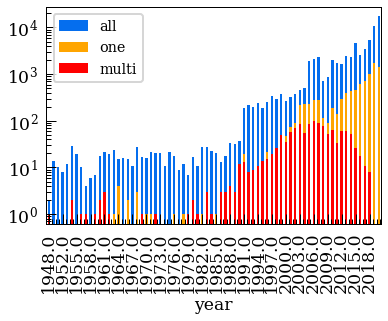

In [34]:
import pylab as plt
ax = final2_df.loc[final2_df.index>1947][["all"]].plot.bar()
ax = final2_df.loc[final2_df.index>1947][["one"]].plot.bar(ax=ax, color="orange", label="one or two")
ax = final2_df.loc[final2_df.index>1947][["multi"]].plot.bar(ax=ax, color="red")
ax.set_xticks(ax.get_xticks()[::3]);
plt.yscale('log')
